# Statistical Testing Exercise

## Statistical Hypothesis

In section [Parametric Distributions](../stats_03_parametric_distributions.ipynb) we discussed how several parametric models can "sort of fit" the empirical distribution. Now suppose that we want to limit the choices and we only want to compare two specific models and decide which one is "more probable". The two models can follow the same family of distributions but with two sets of parameters, for example, normal with two different means, or we can compare the normal distribution to logistic with fixed parameters. Based on these two options, we can design two hypotheses: 

$\mathcal{H_0}: X \sim p_0(\theta_0),$

$\mathcal{H_1}: X \sim p_1(\theta_1),$

where $p_0(\theta_0)$ and $p_1(\theta_1)$ are the two different distributions with their corresponding parameters. $\mathcal{H}_0$ is referred to as null hypothesis and $\mathcal{H}_1$ as alternative hypothesis.

## Hypothesis Test

We would like to come up with a decision strategy based on which to determine if the data supports a certain hypothesis. A **hypothesis test** uses a **test statistic** which is a function of the sample, based on the outcome of which we can distinguish between the two hypotheses. If we assume that the null hypothesis is true, and calculate the distribution of the test statistics under the null hypothesis, we would like to reject the null hypothesis if we observe that the probability of the observed test statistic is low. The region for which the null hypothesis is rejected is called a **critical region**.

How can we come up with such a test statistic and the cutoff for rejection? We need to accepts that we will make some errors.


|Null hypothesis is | TRUE | FALSE|
|-------------------|------|------|
|Not Rejected| Correct| Type I Error |
|Rejected| Type II Error| Correct |


The probability of Type I Error is called a **significance** level and usually denoted by $\alpha$.

The probability of Type II Error is denoted by $\beta$, and the **power** of the test is $1-\beta$.

To design a "good test" one needs to juggle both errors.

### Likelihood Ratio Test

Suppose $X$ was a discrete variable. Then the probability of observing $x$ under each hypothesis is equal to the likelihood function of each model evaluated at $x$. So a measure of which hypothesis is "more likely" is the ratio of the likelihoods and we can design a test statistic based on it:

$$\Lambda(X) = \frac{\mathcal{L(\theta_0|X)}}{\mathcal{L(\theta_1|X)}}$$

and design a test, with a significance level $\alpha$:

Reject $H_0$:$\Lambda(x)\le c$,

Do not reject $H_1$: $\Lambda(x)> c$,

where $c$ is chosen so that $P(\Lambda(X)\le c|\mathcal{H_0}) = \alpha$.




Such a test can be specified also for continuous distributions. 

:::{note}
It turns out that *the likelihood ratio test is the most powerful test among the tests of significance level $\alpha$*! Many of the popular tests in statistics are likelihood ratio tests.
:::

## Transmission Detection Exercise

We want to determine whether ship noise is present in the environment. If there no ship noise, we assume that the distribution of the ambient noise follows a Gaussian distribution. If there is ship noise, the distribution will be skewed. The alternative hypothesis is that the observations are from Gamma distribution. 


$\mathcal{H_0}: X \sim skew\mathcal{N}(\alpha_0, scale_0, loc_0)$
 
$\mathcal{H_1}: X \sim skew\mathcal{N}(\alpha_1, scale_1, loc_1)$


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tr_all = np.load('tr_all.npy')
bg_all = np.load('bg_all.npy')

In [5]:
# first part is to select model parameter from cleaner samples

X_bg = 20*np.log10(bg_all[-500:])
X_tr = 20*np.log10(tr_all[-500:])

In [6]:
# second part is to select samples to test the hypothesis of the two distributions

Y_bg = 20*np.log10(bg_all[-900:-500])
Y_tr = 20*np.log10(tr_all[-900:-500])

In [7]:
# arrange by where in the ranking the sample is
Y_tr = np.sort(Y_tr)
Y_bg = np.sort(Y_bg)

We will follow the following procedure:

1. Set a significance level
2. Calculate the test statistic
3. Determine the critical region based on alpha and the test statistic
4. Make decision

**1. Significance level $\alpha = 0.001$**

Despite some acceptance within specific fields of what a reasonable significance level is, it is important to interpret what it means in terms of the context. In this case, it means that the probability of the scientific problem. In this case, it means if we perform the experiment repeatedly, we will on average wrongly predict ship noise when it is not present $1\%$ of the time. If we would like to detect times when ships were present in a protected zone in which they are not supposed to be present, and we would like to use the detections to notify officials if a ship is present, we would prefer to be really certain that there is a violation before do that. If we are studying the effect of noise on a another process, we could possibly incorporate that error in the follow up analysis, and it is less important about the specific choice, as long as it is small.

In [8]:
alpha = 0.001

**2. Likelihood-ratio test statistic**


In [9]:
import scipy.stats as stats

In [10]:
# set parameters for null distribution (background)

In [11]:
loc_0 = 66
scale_0 = 8.6
a_0 = 10

In [12]:
# set parameters for alternative distribution (transmission)

In [13]:
loc_1 = 86.33124811344999
scale_1 = 3.75
a_1 = 0

In [14]:
# set  the sample to Y_tr or Y_bg
# Y = np.array(Y_tr[10]).reshape((1,1))

In [25]:
loc = -11
Y = np.array(Y_tr[loc:(loc+10)])

In [26]:
null_likelihood = stats.skewnorm.pdf(Y, a=a_0, loc=loc_0, scale=scale_0)
alternative_likelihood = stats.skewnorm.pdf(Y, a=a_1, loc=loc_1, scale=scale_1)

We compute the log likelihood ratio test statistic:

In [27]:
logL_ratio = np.sum(np.log(null_likelihood)) - np.sum(np.log(alternative_likelihood))
print(logL_ratio)

-34.43716247215689


In [28]:
# set the value of the test statistic
T = logL_ratio

**3. Identify critical region**

We would like to determine the threshold $c$ for which the significance level of the test is $\alpha$. Note this can be done before actually observing the sample. What we need for that is to determine the distribution of the likelihood ratio under null hypothesis distribution: in this case the Gaussian distribution with the pre-specified parameters (in this case we extracted them from the sample but we will treat them as known). 

$P(\Lambda(X)\le c)$ = $0.001$, where $X \sim skew\mathcal{N}(\alpha_0, scale_0, loc_0)$

Instead of trying to calculate it analytically, we will simulate a large sample from the Gaussian distribution, evaluate the likelihood ratio on it, and calculate its first percentile.

In [29]:
def evaluateLogL_ratio(x):
  null_likelihood = stats.skewnorm.pdf(x, a=a_0, loc=loc_0, scale=scale_0)
  alternative_likelihood = stats.skewnorm.pdf(x, a=a_1, loc=loc_1, scale=scale_1)
  logL_ratio = np.sum(np.log(null_likelihood)) - np.sum(np.log(alternative_likelihood))
  return(logL_ratio)


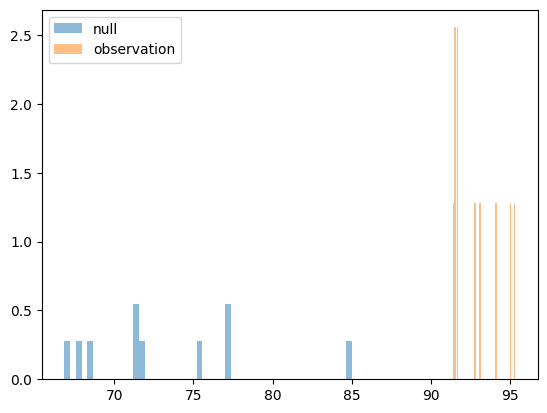

In [30]:
_ = plt.hist(stats.skewnorm.rvs(loc=loc_0, scale=scale_0, a=a_0, size=len(Y)),bins=50, alpha=0.5, density=True, label="null")
_ = plt.hist(Y, bins=50, alpha=0.5, density=True, label="observation")
plt.legend()

In [31]:
# generate sample from the null distribution and evaluate the loglikelihood ratio at each sample point 
test_stat_sample_null = [evaluateLogL_ratio(stats.skewnorm.rvs(loc=loc_0, scale=scale_0, a=a_0, size=len(Y))) for i in range(100000)]

In [32]:
# evaluate the desired percentile from the sample
c = np.percentile(test_stat_sample_null, alpha*100)
print(c)

20.309999731470302


In [33]:
# p-value
percentile = stats.percentileofscore(test_stat_sample_null, T, kind='rank')
print(percentile/100)

0.0


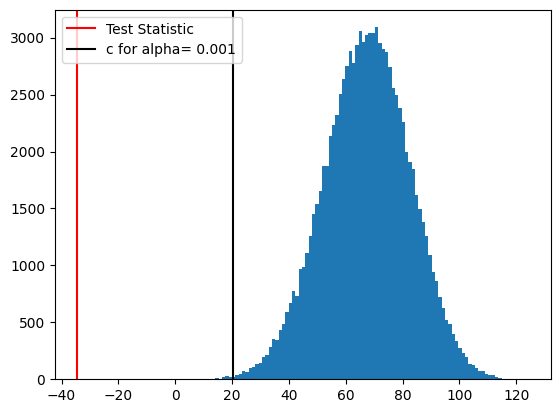

In [34]:
import matplotlib.pyplot as plt

# plot the distribution of the test statisticunder null
out = plt.hist(test_stat_sample_null, bins=100)
plt.axvline(T, color="r", label="Test Statistic")
plt.axvline(c, color="k", label=f"c for alpha= {alpha:.3f}")
plt.legend()

What is the conclusion?

* If we pick values at the upper end of the background, there is a higher chance they can be in the lower tail of the background distribution. The result is we reject the null hypothesis and we make type II error mistakes.

* If we pick values at the lower end of the transmission, there is a higher chance they can be in the upper tail of the background distribution. The result is we cannot reject the null and we make type I error mistakes.

Exercise: evaluate the power of this test.